In [24]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
file_path = '/home/safwan/2021_07_14/2021_07_14_16_05_41_2T3W1RFV0MC103811following_real_vehicle_FSth.bag'
b = bagreader(file_path)

[INFO]  Data folder /home/safwan/2021_07_14/2021_07_14_16_05_41_2T3W1RFV0MC103811following_real_vehicle_FSth already exists. Not creating.


In [26]:
filename = file_path.split('/')[-1]

In [27]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/accel,std_msgs/Float64,7008,176.654340
1,/cmd_accel,std_msgs/Float64,6997,304.133420
2,/cmd_vel,geometry_msgs/Twist,1403,19.966268
3,/commands,std_msgs/Float64,7024,100.016787
4,/highbeams,std_msgs/Float64,71,0.999742
5,/lead_dist,std_msgs/Float64,702,164.231332
6,/region,std_msgs/UInt8,1403,19.968502
7,/rel_vel,geometry_msgs/Twist,2698,54.208184
8,/rosout,rosgraph_msgs/Log,10,42366.707071
9,/rosout_agg,rosgraph_msgs/Log,10,35246.252101


In [29]:
CMD_ACC_MSG = b.message_by_topic('/cmd_accel') #commanded accel
ACC_MSG = b.message_by_topic('/accel') # car accel
# GHOST_VEL_MSG = b.message_by_topic('/ghost/vehicle/vel')
LEAD_DIST = b.message_by_topic('/lead_dist') #lead dist
VEL_MSG = b.message_by_topic('/vel') # velocty 
TH_MSG = b.message_by_topic('/timheadway1')

In [30]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
# df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_lead_dist = pd.read_csv(LEAD_DIST)
df_vel = pd.read_csv(VEL_MSG)
df_th_msg = pd.read_csv(TH_MSG)
t0 = df_vel['Time'][0]

In [31]:
df_vel

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.626304e+09,0.00,0.0,0.0,0.0,0.0,0.0
1,1.626304e+09,0.00,0.0,0.0,0.0,0.0,0.0
2,1.626304e+09,0.00,0.0,0.0,0.0,0.0,0.0
3,1.626304e+09,0.00,0.0,0.0,0.0,0.0,0.0
4,1.626304e+09,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3506,1.626304e+09,9.91,0.0,0.0,0.0,0.0,0.0
3507,1.626304e+09,9.93,0.0,0.0,0.0,0.0,0.0
3508,1.626304e+09,9.93,0.0,0.0,0.0,0.0,0.0
3509,1.626304e+09,9.94,0.0,0.0,0.0,0.0,0.0


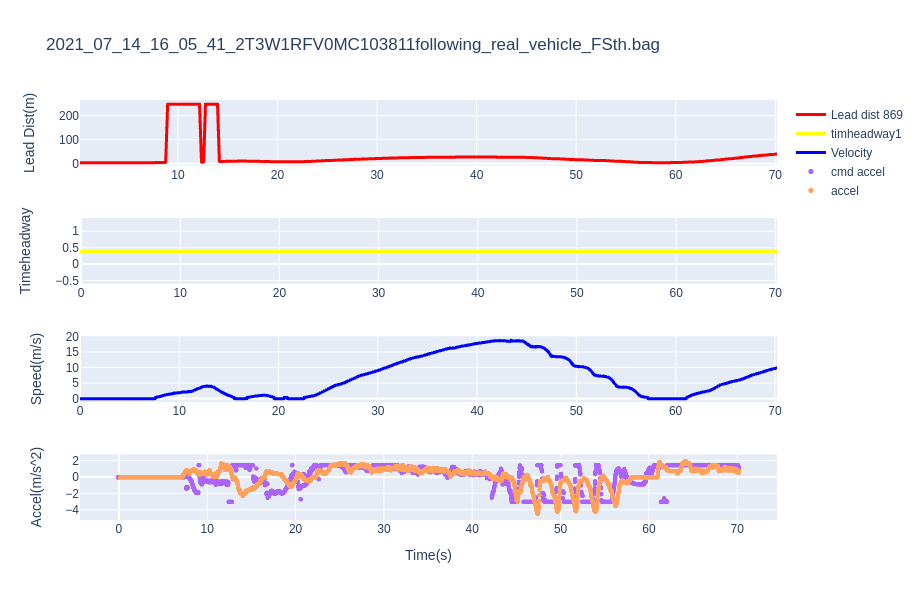

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=4, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_lead_dist['Time']-t0,
    y=df_lead_dist['data'],
     name="Lead dist 869",
      line=dict(
        width=3,
          color="red",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_th_msg['Time']-t0,
    y=df_th_msg['data'],
     name="timheadway1",
      line=dict(
        width=3,
          color="yellow",
     ),
), row=2, col=1)
figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="Velocity",
), row=3, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=4, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=4, col=1)

figr.update_xaxes(title_text="Time(s)", row=4, col=1)

figr.update_yaxes(title_text="Lead Dist(m)", row=1, col=1)
figr.update_yaxes(title_text="Timeheadway", row=2, col=1)
figr.update_yaxes(title_text="Speed(m/s)", row=3, col=1)
figr.update_yaxes(title_text="Accel(m/s^2)", row=4, col=1)




figr.update_layout(height=600, width=800, title_text=filename)
figr.show()